# K Means Clustering with Python

## Method Used

K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps:
Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster. These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

## Import Libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

## Create some Data

In [2]:
from sklearn.datasets import make_blobs

In [25]:
# Create Data
# std lebih kecil maka persebaran datanya makin deket
# std lebih besar maka persebaran datanya makin jauh
data = make_blobs(n_samples=200, n_features=2, 
                           centers=4, cluster_std=1.8,random_state=101)

data

(array([[-6.42884095e+00,  1.01411174e+01],
        [ 5.86867888e+00,  5.20110356e+00],
        [-3.76109375e-01,  3.26427943e+00],
        [ 2.16679181e+00,  9.56300522e+00],
        [ 5.09508570e+00,  7.20752718e+00],
        [-1.08788882e+01, -6.11318040e+00],
        [ 2.03405554e+00,  9.76664755e+00],
        [-1.71798771e+00,  1.41401140e+00],
        [ 1.16911341e+00,  8.24556988e+00],
        [-1.35185444e+00,  3.13245345e+00],
        [-6.18548214e+00,  9.67406555e+00],
        [-1.19856602e+00,  2.50408937e+00],
        [ 2.90296863e+00,  7.91251003e+00],
        [ 2.39250023e+00,  5.38173971e+00],
        [-5.27545147e+00,  9.63836659e+00],
        [-5.66814687e-01,  5.60262755e-02],
        [ 5.97336628e+00,  5.87172022e+00],
        [-2.31355268e+00,  5.23980092e-01],
        [-1.01344756e+01, -3.43130837e+00],
        [-4.54082629e+00,  1.13920174e+01],
        [-1.04155833e+01, -5.67545836e+00],
        [ 6.64796693e-01,  9.42304718e-02],
        [ 2.11460477e+00,  3.559

In [23]:
df = pd.DataFrame(data[0], columns=['Features 1','Features 2'])
df['Category'] = data[1]
df.head()

                      

,Features 1,Features 2,Category
0,-6.428841,10.141117,3
1,5.868679,5.201104,2
2,-0.376109,3.264279,0
3,2.166792,9.563005,2
4,5.095086,7.207527,2


In [5]:
df['Category'].value_counts()

3    50
2    50
1    50
0    50
Name: Category, dtype: int64

In [22]:
for cat in df['Category'].unique():
    print('Category ' + str(cat))
    print(df[df['Category'] == cat].std())
    

Category 3
Features 1    2.091960
Features 2    1.764169
Category      0.000000
dtype: float64
Category 2
Features 1    1.966976
Features 2    1.869660
Category      0.000000
dtype: float64
Category 0
Features 1    1.790020
Features 2    1.895876
Category      0.000000
dtype: float64
Category 1
Features 1    1.594255
Features 2    2.079911
Category      0.000000
dtype: float64


## Visualize Data

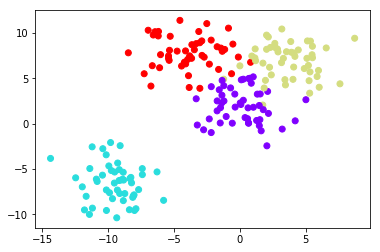

In [7]:
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

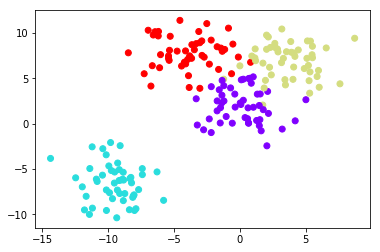

In [24]:
plt.scatter(df['Features 1'],df['Features 2'],c=df['Category'],cmap='rainbow')

## Creating the Clusters

In [8]:
from sklearn.cluster import KMeans

In [9]:
kmeans = KMeans(n_clusters=4)

In [26]:
# kmeans.fit(data[0])
kmeans.fit(df[['Features 1','Features 2']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [27]:
kmeans.cluster_centers_

array([[ 3.71749226,  7.01388735],
       [-0.0123077 ,  2.13407664],
       [-9.46941837, -6.56081545],
       [-4.13591321,  7.95389851]])

In [12]:
kmeans.labels_

array([2, 0, 3, 0, 0, 1, 0, 3, 0, 3, 2, 3, 0, 0, 2, 3, 0, 3, 1, 2, 1, 3,
       3, 1, 2, 1, 1, 3, 0, 0, 2, 1, 0, 3, 3, 2, 1, 1, 1, 3, 1, 2, 2, 2,
       3, 0, 2, 3, 1, 3, 3, 2, 0, 3, 1, 2, 3, 3, 2, 0, 1, 0, 1, 2, 0, 3,
       1, 0, 0, 1, 0, 3, 1, 3, 1, 0, 0, 3, 2, 3, 3, 1, 0, 1, 3, 3, 3, 2,
       3, 1, 1, 1, 1, 3, 3, 1, 0, 2, 1, 0, 3, 1, 3, 3, 0, 3, 1, 0, 1, 1,
       0, 2, 2, 0, 1, 0, 2, 2, 0, 2, 3, 2, 3, 2, 3, 0, 2, 3, 1, 2, 2, 2,
       3, 1, 1, 2, 0, 2, 0, 3, 1, 0, 1, 2, 2, 0, 3, 1, 2, 2, 2, 2, 3, 0,
       3, 2, 0, 0, 0, 3, 0, 3, 3, 2, 1, 2, 3, 0, 2, 3, 0, 3, 2, 0, 3, 2,
       0, 0, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 0, 0, 2, 1, 3, 0, 0,
       1, 3])

In [32]:
dfkmeans = pd.DataFrame(data[0], columns=['Features 1','Features 2'])
dfkmeans['Category'] = kmeans.labels_ #category seperti targetnya dan hasil pengelompokan kmeans
df.head()

,Features 1,Features 2,Category
0,-6.428841,10.141117,3
1,5.868679,5.201104,0
2,-0.376109,3.264279,1
3,2.166792,9.563005,0
4,5.095086,7.207527,0


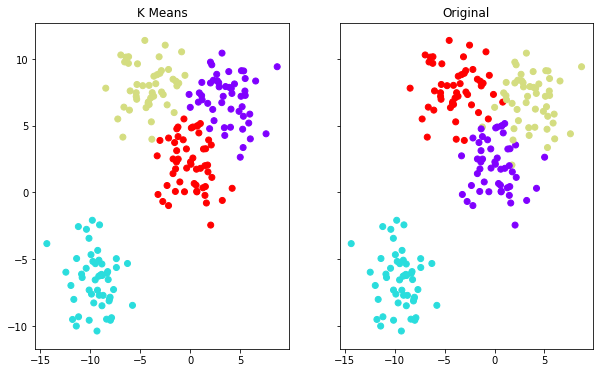

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

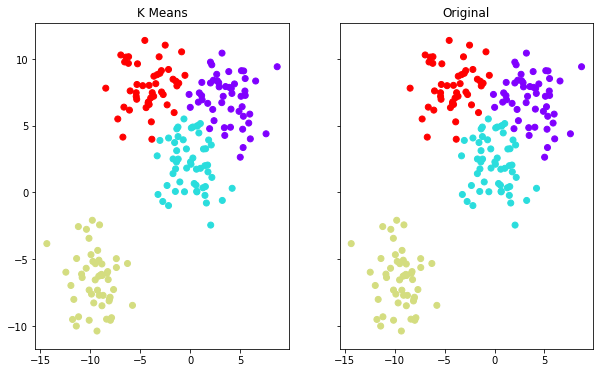

In [33]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(df['Features 1'],df['Features 2'],c=dfkmeans['Category'],cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(df['Features 1'],df['Features 2'],c=df['Category'],cmap='rainbow')

You should note, the colors are meaningless in reference between the two plots.

# Great Job!